In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Preview

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/VAERSDATA/Multimorbidity_BP_D_HC.csv',encoding='latin-1')
df.head()


,AGE_YRS,SEX,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,CUR_ILL,HBP,...,OTHER_ILLN,PRIOR_VAX,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,POST_VAX_SYMPTOM,VAX_DOSE_SERIES,DOSE_COMPLETE,VAX_NAME,DIED
0,42,F,N,N,0,N,N,U,Y,Y,...,Y,N,N,N,Y,Y,1,N,E,N
1,71,F,N,N,0,N,N,N,Y,Y,...,Y,Y,N,N,N,Y,1,N,E,N
2,44,M,N,N,0,N,N,Y,N,Y,...,N,N,N,N,N,Y,1,N,E,N
3,44,M,N,N,0,N,N,Y,N,Y,...,N,N,N,N,N,Y,1,N,E,N
4,49,F,N,N,0,N,N,Y,Y,Y,...,Y,N,N,N,Y,Y,1,N,E,N


*View* the Dimension of the Dataset

In [3]:
# print the shape
print("Shape of the Dataset: {}".format(df.shape))


Shape of the Dataset: (11077, 22)


### There are 11077 instances and 22 attributes in the data set.



View the Summary of the Dataset

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AGE_YRS           11077 non-null  int64 
 1   SEX               11077 non-null  object
 2   L_THREAT          11077 non-null  object
 3   HOSPITAL          11077 non-null  object
 4   HOSPDAYS          11077 non-null  int64 
 5   X_STAY            11077 non-null  object
 6   DISABLE           11077 non-null  object
 7   RECOVD            11077 non-null  object
 8   CUR_ILL           11077 non-null  object
 9   HBP               11077 non-null  object
 10  DIABETES          11077 non-null  object
 11  H_CHOL            11077 non-null  object
 12  OTHER_ILLN        11077 non-null  object
 13  PRIOR_VAX         11077 non-null  object
 14  BIRTH_DEFECT      11077 non-null  object
 15  OFC_VISIT         11077 non-null  object
 16  ER_ED_VISIT       11077 non-null  object
 17  POST_VAX_SYM

Preprocessing

Check the Categorical and Numerical Columns

In [5]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
print('There are {} categorical variables\n'.format(len(cat_col)))
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
print('There are {} numerical variables\n'.format(len(num_col)))



Categorical columns : ['SEX', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'CUR_ILL', 'HBP', 'DIABETES', 'H_CHOL', 'OTHER_ILLN', 'PRIOR_VAX', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'POST_VAX_SYMPTOM', 'DOSE_COMPLETE', 'VAX_NAME', 'DIED']
There are 19 categorical variables

Numerical columns : ['AGE_YRS', 'HOSPDAYS', 'VAX_DOSE_SERIES']
There are 3 numerical variables



Check the Data Types of Columns


In [6]:
df.dtypes

,0
AGE_YRS,int64
SEX,object
L_THREAT,object
HOSPITAL,object
HOSPDAYS,int64
X_STAY,object
DISABLE,object
RECOVD,object
CUR_ILL,object
HBP,object


Statistical Properties of the data

In [7]:
df.describe() # for the numerical variables

,AGE_YRS,HOSPDAYS,VAX_DOSE_SERIES
count,11077.000000,11077.000000,11077.000000
mean,66.620204,1.996660,1.403719
std,13.287135,5.022654,0.490665
min,18.000000,0.000000,1.000000
25%,58.000000,0.000000,1.000000
50%,67.000000,0.000000,1.000000
75%,76.000000,2.000000,2.000000
max,103.000000,91.000000,2.000000


In [8]:
df.describe().T #  In horizontal form

,count,mean,std,min,25%,50%,75%,max
AGE_YRS,11077.0,66.620204,13.287135,18.0,58.0,67.0,76.0,103.0
HOSPDAYS,11077.0,1.996660,5.022654,0.0,0.0,0.0,2.0,91.0
VAX_DOSE_SERIES,11077.0,1.403719,0.490665,1.0,1.0,1.0,2.0,2.0


In [9]:
  df.describe(include=['object']) # for the categorical variables


,SEX,L_THREAT,HOSPITAL,X_STAY,DISABLE,RECOVD,CUR_ILL,HBP,DIABETES,H_CHOL,OTHER_ILLN,PRIOR_VAX,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,POST_VAX_SYMPTOM,DOSE_COMPLETE,VAX_NAME,DIED
count,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077
unique,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,1,2,6,2
top,F,N,N,N,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,E,N
freq,6242,10751,6917,11066,10764,4493,9235,11040,6958,6947,9142,10561,11071,8207,8585,11077,5760,5141,10042


In [10]:
df.describe(include='all') # for both numerical and categorical variables


,AGE_YRS,SEX,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,CUR_ILL,HBP,...,OTHER_ILLN,PRIOR_VAX,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,POST_VAX_SYMPTOM,VAX_DOSE_SERIES,DOSE_COMPLETE,VAX_NAME,DIED
count,11077.000000,11077,11077,11077,11077.000000,11077,11077,11077,11077,11077,...,11077,11077,11077,11077,11077,11077,11077.000000,11077,11077,11077
unique,NaN,2,2,2,NaN,2,2,3,2,2,...,2,2,2,2,2,1,NaN,2,6,2
top,NaN,F,N,N,NaN,N,N,N,N,Y,...,Y,N,N,N,N,Y,NaN,N,E,N
freq,NaN,6242,10751,6917,NaN,11066,10764,4493,9235,11040,...,9142,10561,11071,8207,8585,11077,NaN,5760,5141,10042
mean,66.620204,NaN,NaN,NaN,1.996660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.403719,NaN,NaN,NaN
std,13.287135,NaN,NaN,NaN,5.022654,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.490665,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,58.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,67.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,76.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


In [11]:
# check for missing values

df.isnull().sum()


,0
AGE_YRS,0
SEX,0
L_THREAT,0
HOSPITAL,0
HOSPDAYS,0
X_STAY,0
DISABLE,0
RECOVD,0
CUR_ILL,0
HBP,0




```
# This is formatted as code
```

There are no missing values in the dataset. the missing values has been fixed before loading the dataset

Data Transformation

*   Scaling for Numerical Data
*   Encoding for Categorical Data

In [12]:
# Numerical data scaling
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in df.columns if df[col].dtype != 'object']

# learning the statistical parameters for each of the data and transforming
df[num_col_] = scaler.fit_transform(df[num_col_])
df.head()



,AGE_YRS,SEX,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,CUR_ILL,HBP,...,OTHER_ILLN,PRIOR_VAX,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,POST_VAX_SYMPTOM,VAX_DOSE_SERIES,DOSE_COMPLETE,VAX_NAME,DIED
0,0.282353,F,N,N,0.0,N,N,U,Y,Y,...,Y,N,N,N,Y,Y,0.0,N,E,N
1,0.623529,F,N,N,0.0,N,N,N,Y,Y,...,Y,Y,N,N,N,Y,0.0,N,E,N
2,0.305882,M,N,N,0.0,N,N,Y,N,Y,...,N,N,N,N,N,Y,0.0,N,E,N
3,0.305882,M,N,N,0.0,N,N,Y,N,Y,...,N,N,N,N,N,Y,0.0,N,E,N
4,0.364706,F,N,N,0.0,N,N,Y,Y,Y,...,Y,N,N,N,Y,Y,0.0,N,E,N


In [13]:
#Categorical data encoding
#one hot encoding using OneHotEncoder of Scikit-Learn
from sklearn.preprocessing import OneHotEncoder

#Here we extract the columns with object datatype as they are the categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[cat_col])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_col))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
#df_encoded = df_encoded.drop(cat_col, axis=1)
print(df_encoded.head())





    AGE_YRS SEX L_THREAT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD CUR_ILL HBP  \
0  0.282353   F        N        N       0.0      N       N      U       Y   Y   
1  0.623529   F        N        N       0.0      N       N      N       Y   Y   
2  0.305882   M        N        N       0.0      N       N      Y       N   Y   
3  0.305882   M        N        N       0.0      N       N      Y       N   Y   
4  0.364706   F        N        N       0.0      N       N      Y       Y   Y   

   ... DOSE_COMPLETE_N DOSE_COMPLETE_Y VAX_NAME_A VAX_NAME_B VAX_NAME_C  \
0  ...             1.0             0.0        0.0        0.0        0.0   
1  ...             1.0             0.0        0.0        0.0        0.0   
2  ...             1.0             0.0        0.0        0.0        0.0   
3  ...             1.0             0.0        0.0        0.0        0.0   
4  ...             1.0             0.0        0.0        0.0        0.0   

  VAX_NAME_D VAX_NAME_E VAX_NAME_F  DIED_N DIED_Y  
0        0

# **FEATURE SELECTION USING LASSO REGRESSION**




Separating the Train and Test Data

In [14]:
# Separating the train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# Segregating the Feature and Target
X = df_encoded.drop(["DIED_N","DIED_Y"], axis=1).values
y = df_encoded[["DIED_N","DIED_Y"]].values

#X = df.drop(["DIED"], axis=1).values
#y = df["DIED"].values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (7753, 62)
Shape of Test Features: (3324, 62)
Shape of Train Target: (7753, 2)
Shape of Test Target: (3324, 2)


# **Using GridSearchCV to find the best hyperparameter**



In [15]:
# Separating the train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

# Assuming 'df_encoded' is your dataframe with encoded features
X = df_encoded.drop(["DIED_N","DIED_Y"], axis=1)
y = df_encoded[["DIED_N","DIED_Y"]].values

# Identify categorical columns (assuming object dtype represents categorical)
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply OneHotEncoder to categorical columns
if categorical_cols:  # Check if there are any categorical columns
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = ohe.fit_transform(X[categorical_cols])

    # Create a DataFrame from the encoded data
    X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(categorical_cols))

    # Drop original categorical columns and concatenate encoded ones
    X = X.drop(categorical_cols, axis=1)
    X = pd.concat([X, X_encoded_df], axis=1)

X = X.values # Convert X to a numpy array

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y) # Now fit on the fully numerically encoded data
print("Best Params {}".format(lasso_cv.best_params_))

Shape of Train Features: (7753, 85)
Shape of Test Features: (3324, 85)
Shape of Train Target: (7753, 2)
Shape of Test Target: (3324, 2)
Best Params {'alpha': 1e-05}


In [16]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))


Best Params {'alpha': 1e-05}


Using Lasso Regressor (with best hyperparameter from the GridSearchCV, that is, alpha = 0.00001) to Select the Best Features

In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Assuming X is your feature matrix and y is the target variable
categorical_cols = ['SEX', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'CUR_ILL', 'HBP', 'DIABETES', 'H_CHOL', 'OTHER_ILLN', 'PRIOR_VAX', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'POST_VAX_SYMPTOM', 'DOSE_COMPLETE', 'VAX_NAME'] # Removed 'DIED' from categorical_cols
numerical_cols = ['AGE_YRS', 'HOSPDAYS', 'VAX_DOSE_SERIES']

# Preprocessing
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
transformers=[
('num', 'passthrough', numerical_cols),
('cat', categorical_transformer, categorical_cols)
])
X_transformed = preprocessor.fit_transform(df.drop('DIED', axis=1)) # Removed 'DIED' from the DataFrame before transformation

# Encode the target variable 'DIED'
#label_encoder = LabelEncoder()
#y_transformed = label_encoder.fit_transform(df['DIED'])
encoder = OneHotEncoder(sparse_output=False)

y_transformed = encoder.fit_transform(df[['DIED']])


# Lasso Regression
lasso = Lasso(alpha=0.00001) # Adjust alpha as needed
lasso.fit(X_transformed, y_transformed) # Use the transformed target variable


# Fit the categorical transformer before getting feature names
categorical_transformer.fit(df[categorical_cols]) # Fit the OneHotEncoder to the categorical columns

# Get selected features (coefficients not equal to zero)
# Get feature names from the preprocessor
feature_names = numerical_cols + categorical_transformer.get_feature_names_out(categorical_cols).tolist()

# Iterate over coefficients and check if they are non-zero for any target class
selected_features = [feature_names[i] for i in range(len(feature_names)) if (lasso.coef_[:, i] > 0.01).any()]
print("\nSelected Features: {}\n".format(selected_features))


Selected Features: ['AGE_YRS', 'HOSPDAYS', 'SEX_F', 'L_THREAT_N', 'HOSPITAL_N', 'X_STAY_N', 'DISABLE_N', 'RECOVD_N', 'RECOVD_Y', 'CUR_ILL_N', 'HBP_N', 'DIABETES_N', 'OTHER_ILLN_N', 'PRIOR_VAX_N', 'BIRTH_DEFECT_N', 'OFC_VISIT_N', 'ER_ED_VISIT_N', 'DOSE_COMPLETE_N', 'VAX_NAME_C']



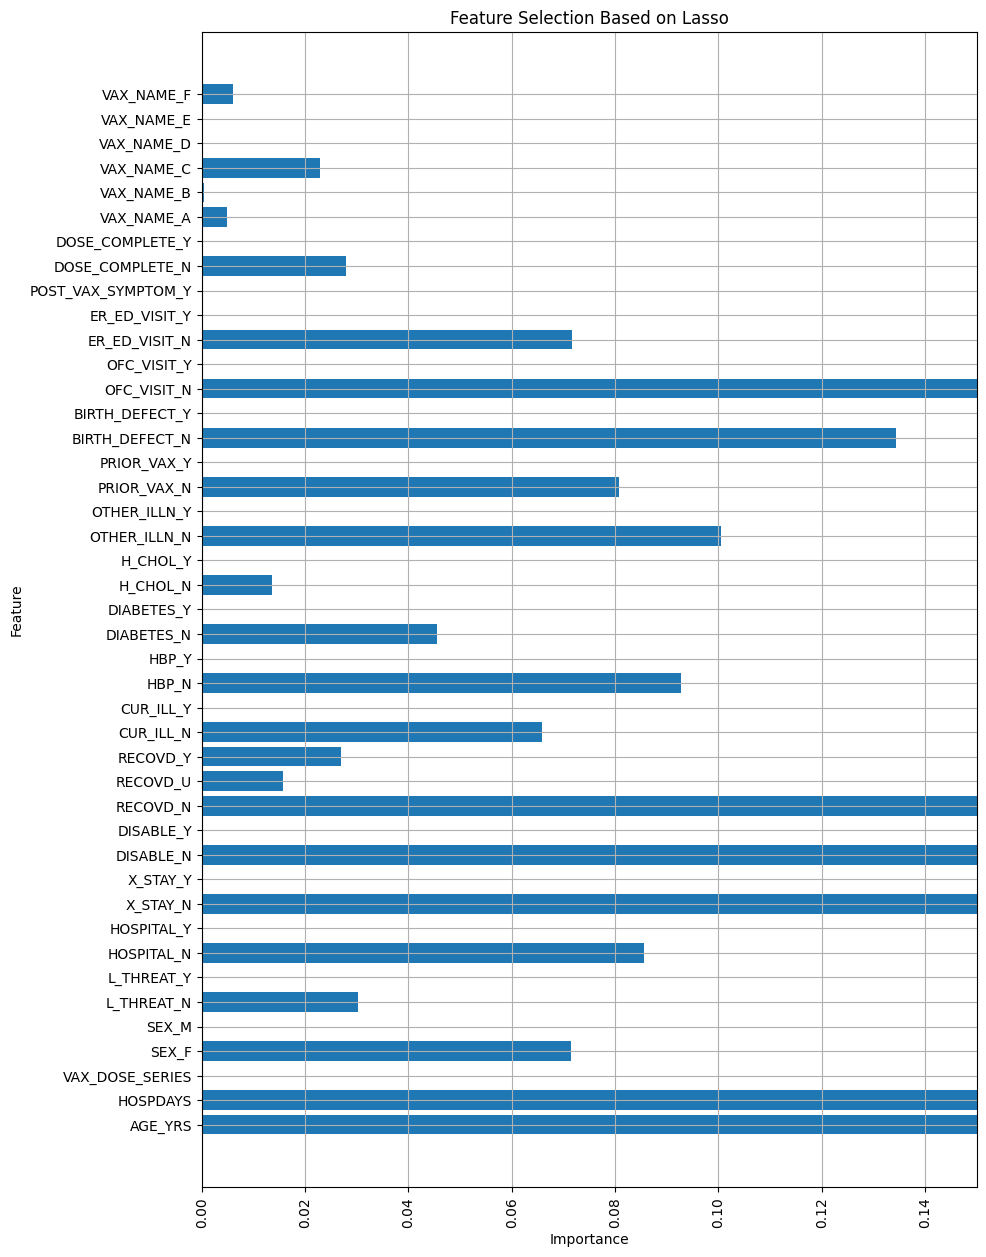

In [18]:
# plotting the Column Names and Importance of Columns.
# Sum the absolute values of coefficients across classes for visualization
f, ax = plt.subplots(figsize=(10, 15))
#plt.bar(feature_names, np.sum(np.abs(lasso.coef_), axis=0)) # Swap feature_names and np.sum result
plt.barh(feature_names, np.sum(np.abs(lasso.coef_), axis=0))
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.ylabel("Feature")
plt.xlabel("Importance")
# Adjust ylim if needed after summing coefficients
plt.xlim(0, 0.15)
plt.show()

In [19]:
# Adding the target to the list of features.
selected_features = np.append(selected_features, "DIED_N")
selected_features = np.append(selected_features, "DIED_Y")

print("Selected Columns: {}".format(selected_features))

Selected Columns: ['AGE_YRS' 'HOSPDAYS' 'SEX_F' 'L_THREAT_N' 'HOSPITAL_N' 'X_STAY_N'
 'DISABLE_N' 'RECOVD_N' 'RECOVD_Y' 'CUR_ILL_N' 'HBP_N' 'DIABETES_N'
 'OTHER_ILLN_N' 'PRIOR_VAX_N' 'BIRTH_DEFECT_N' 'OFC_VISIT_N'
 'ER_ED_VISIT_N' 'DOSE_COMPLETE_N' 'VAX_NAME_C' 'DIED_N' 'DIED_Y']


Subsetting best features to form a new dataset




In [20]:
# New dataset based on the selected features
df_lasso = df_encoded[selected_features]
print(df_lasso.head())


    AGE_YRS  HOSPDAYS  SEX_F  L_THREAT_N  HOSPITAL_N  X_STAY_N  DISABLE_N  \
0  0.282353       0.0    1.0         1.0         1.0       1.0        1.0   
1  0.623529       0.0    1.0         1.0         1.0       1.0        1.0   
2  0.305882       0.0    0.0         1.0         1.0       1.0        1.0   
3  0.305882       0.0    0.0         1.0         1.0       1.0        1.0   
4  0.364706       0.0    1.0         1.0         1.0       1.0        1.0   

   RECOVD_N  RECOVD_Y  CUR_ILL_N  ...  DIABETES_N  OTHER_ILLN_N  PRIOR_VAX_N  \
0       0.0       0.0        0.0  ...         1.0           0.0          1.0   
1       1.0       0.0        0.0  ...         0.0           0.0          0.0   
2       0.0       1.0        1.0  ...         0.0           1.0          1.0   
3       0.0       1.0        1.0  ...         0.0           1.0          1.0   
4       0.0       1.0        0.0  ...         0.0           0.0          1.0   

   BIRTH_DEFECT_N  OFC_VISIT_N  ER_ED_VISIT_N  DOSE_COMP

## **FEATURE IMPORTANCE WITH RANDOM FORESTS**

Feed the  X_train dataset ready to be fed into the Random Forest classifier.

Random Forest Classifier model with Default Parameters

In [115]:
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier

from sklearn.preprocessing import StandardScaler


# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Preprocess categorical features using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features (optional but recommended)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features (X) and target (y)
X = df.drop('DIED', axis=1)
y = df['DIED']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train a RandomForestClassifier
rf = RandomForestRegressor(n_estimators=10, random_state=42) # Change to RandomForestRegressor
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print feature importances
print(feature_importances)

# Select top N features (example: top 2)
top_n_features = feature_importances['feature'][:2].tolist()
print("\nTop 2 features:", top_n_features)

# Select features above a threshold (example: 0.1)
threshold = 0.001
selected_features = feature_importances[feature_importances['importance'] >= threshold]['feature'].tolist()
print("\nSelected features (importance >= 0.001):", selected_features)

             feature  importance
0            AGE_YRS    0.283436
4           HOSPDAYS    0.159604
7             RECOVD    0.121282
15         OFC_VISIT    0.075772
20          VAX_NAME    0.050004
16       ER_ED_VISIT    0.037573
10          DIABETES    0.036525
1                SEX    0.036311
11            H_CHOL    0.035329
3           HOSPITAL    0.030974
8            CUR_ILL    0.028147
18   VAX_DOSE_SERIES    0.025854
19     DOSE_COMPLETE    0.025845
12        OTHER_ILLN    0.021154
6            DISABLE    0.017229
13         PRIOR_VAX    0.006788
2           L_THREAT    0.006771
14      BIRTH_DEFECT    0.000662
9                HBP    0.000423
5             X_STAY    0.000320
17  POST_VAX_SYMPTOM    0.000000

Top 2 features: ['AGE_YRS', 'HOSPDAYS']

Selected features (importance >= 0.001): ['AGE_YRS', 'HOSPDAYS', 'RECOVD', 'OFC_VISIT', 'VAX_NAME', 'ER_ED_VISIT', 'DIABETES', 'SEX', 'H_CHOL', 'HOSPITAL', 'CUR_ILL', 'VAX_DOSE_SERIES', 'DOSE_COMPLETE', 'OTHER_ILLN', 'DISABLE', 'PRI

In [126]:
# select the top 19 features

# Select the top 19 features based on the 'importance' column
top_19_features = feature_importances['feature'][:19].tolist()
print("\nTop 19 features:", top_19_features)


Top 19 features: ['AGE_YRS', 'HOSPDAYS', 'RECOVD', 'OFC_VISIT', 'VAX_NAME', 'ER_ED_VISIT', 'DIABETES', 'SEX', 'H_CHOL', 'HOSPITAL', 'CUR_ILL', 'VAX_DOSE_SERIES', 'DOSE_COMPLETE', 'OTHER_ILLN', 'DISABLE', 'PRIOR_VAX', 'L_THREAT', 'BIRTH_DEFECT', 'HBP']


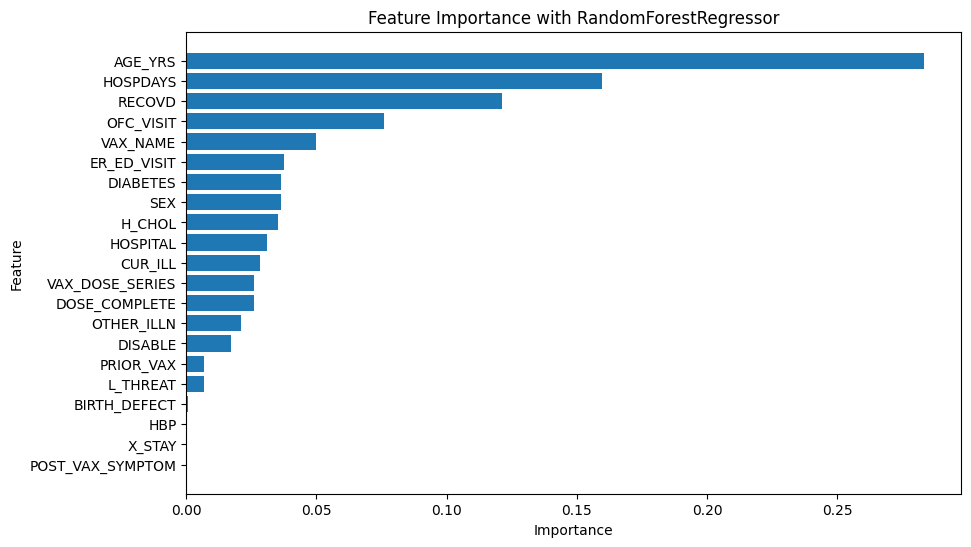

In [116]:
'''import matplotlib.pyplot as plt
import pandas as pd'''

# Assuming 'feature_importances' DataFrame is already created as in the provided code
# ... (previous code to create feature_importances DataFrame)

# Ensure feature_importances is a DataFrame with correct columns:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}) # convert the numpy array to a dataframe
feature_importances = feature_importances.sort_values('importance', ascending=False)


# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with RandomForestRegressor')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [117]:
# prompt: perform log likelihod to compare lasso and randomforest regressor

import numpy as np
#from sklearn.metrics import log_loss # log_loss is for classification
from sklearn.metrics import mean_squared_error, r2_score # import appropriate metrics for regression
from sklearn.model_selection import train_test_split # Import train_test_split for data splitting

# Assuming 'lasso' and 'rf' are your trained models
# Assuming 'X' and 'y' are your full data (before splitting)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data here

# Retrain Lasso model using the training data with the same features as X_test
# This is crucial to ensure the model expects the correct number of features
lasso.fit(X_train, y_train) # Retrain Lasso with the same features as X_test


# Get predictions from Lasso
lasso_preds = lasso.predict(X_test)


# Get predictions from Random Forest
rf_preds = rf.predict(X_test)

# Calculate Mean Squared Error (MSE) for Lasso
lasso_mse = mean_squared_error(y_test, lasso_preds)
print(f"Lasso MSE: {lasso_mse}")

# Calculate MSE for Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse}")


# Calculate R-squared for Lasso
lasso_r2 = r2_score(y_test, lasso_preds)
print(f"Lasso R-squared: {lasso_r2}")

# Calculate R-squared for Random Forest
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest R-squared: {rf_r2}")


# Compare MSE and R-squared values to determine which model performs better.
# Lower MSE and higher R-squared indicate better performance.
if lasso_mse < rf_mse and lasso_r2 > rf_r2:
    print("Lasso performs better based on MSE and R-squared.")
elif rf_mse < lasso_mse and rf_r2 > lasso_r2:
    print("Random Forest performs better based on MSE and R-squared.")
else:
    print("Model performance is inconclusive based on MSE and R-squared.")

Lasso MSE: 0.7901617539601951
Random Forest MSE: 0.71190103847286
Lasso R-squared: 0.20964630119957062
Random Forest R-squared: 0.2879260276558061
Random Forest performs better based on MSE and R-squared.


In [81]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9997


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

The Random Forest Classifier model was built with default parameter of n_estimators = 10. That is, 10 decision-trees were used to build the model. Let's increase the number of decision-trees and see its effect on accuracy.

Random Forest Classifier model with 100 Decision Trees

In [23]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc_100.fit(X_train, y_train)


# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


The model accuracy score with 10 decision-trees is 0.9997 but the higher with 100 decision-trees is 1.0000. So, as expected accuracy increases with number of decision-trees in the model.




Find important features with Random Forest model

In [24]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Use the feature importance variable to see feature importance scores.



From the feature importance score, the most important feature is AGE_YRS and least important feature is POST_VAX_SYMPTOM_1.



[1.91697481e-02 1.37891622e-02 8.68284526e-04 1.08468348e-03
 1.08019295e-03 2.14676304e-04 2.56616421e-04 2.47571018e-03
 1.84346889e-03 4.75789491e-08 4.18889558e-06 1.06341326e-03
 5.59063114e-04 3.23581957e-02 5.18091412e-03 7.00966218e-03
 9.86244948e-04 1.53643737e-03 1.29331017e-05 6.86648875e-06
 6.41607153e-04 5.95143350e-04 6.34554641e-04 6.06614353e-04
 1.39252249e-03 1.09447126e-03 3.41084253e-04 3.74870703e-04
 1.45941397e-05 2.19565434e-05 3.84262915e-03 4.52429954e-03
 1.10749444e-03 8.07274928e-04 0.00000000e+00 5.47795663e-04
 3.95975663e-04 3.39944067e-04 8.48412270e-04 6.91615498e-05
 0.00000000e+00 6.23786733e-04 1.13897199e-04 8.33415964e-04
 1.07513957e-03 1.98027258e-04 2.82122858e-04 2.81322837e-03
 2.55466372e-03 1.18983363e-05 0.00000000e+00 4.79740073e-04
 6.28715975e-04 2.71213361e-02 4.36528540e-03 9.97183119e-03
 1.39470039e-03 8.72063935e-04 5.52238347e-07 4.76797574e-06
 4.35077354e-04 5.76700799e-04 7.06108396e-04 6.05922357e-04
 1.26202438e-03 2.347709

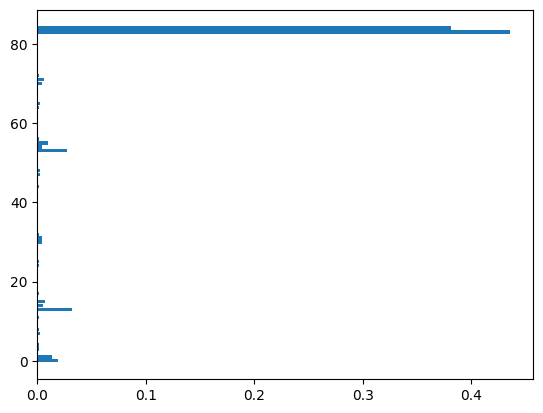

In [30]:
# Use the feature importance variable to see feature importance score

importances = clf.feature_importances_
# Print or visualize the importances
print(importances)
# You can also visualize it with a bar plot
# ... (plotting code as before)
import matplotlib.pyplot as plt
plt.barh(range(len(importances)), importances)
plt.show()


Visualize feature scores of the features





Length of importances: 21
Length of feature_names: 64


<ipython-input-114-d021fb76bc26>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.round(feature_scores.values, 2), y=range(len(feature_scores.index.to_list())), palette=colors)
<ipython-input-114-d021fb76bc26>:30: UserWarning: The palette list has more values (64) than needed (10), which may not be intended.
  ax = sns.barplot(x=np.round(feature_scores.values, 2), y=range(len(feature_scores.index.to_list())), palette=colors)


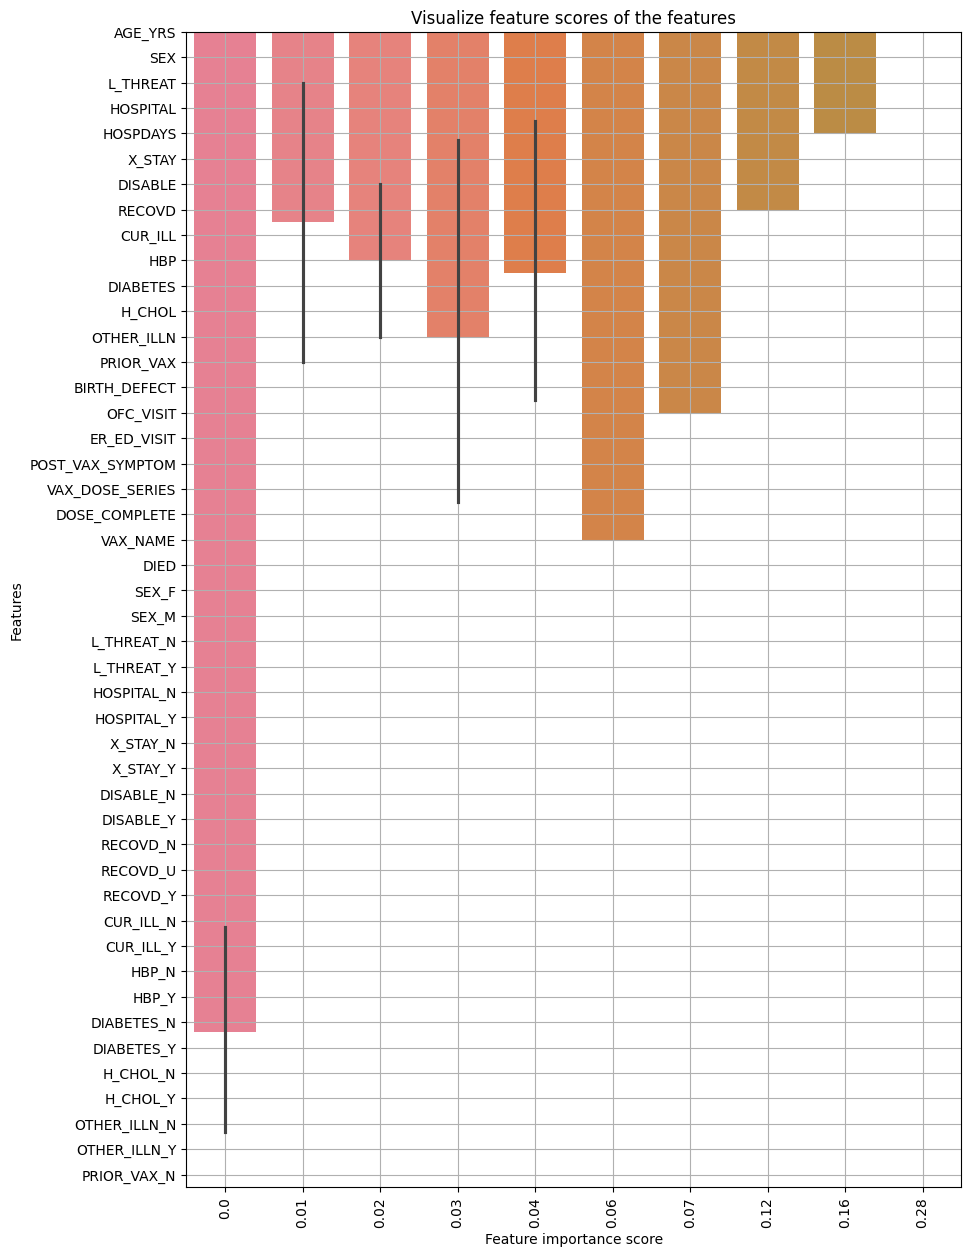

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming 'importances' is from your previous cell and you have 'feature_names'
# Check the lengths of importances and feature_names
print(f"Length of importances: {len(importances)}")
print(f"Length of feature_names: {len(feature_names)}")

# If lengths don't match, investigate why and adjust accordingly
# If importances is shorter, consider extending it (e.g., with zeros) to match feature_names
if len(importances) < len(feature_names):
    importances = np.pad(importances, (0, len(feature_names) - len(importances)), 'constant')
#Alternatively, If feature_names has extra values, consider truncating it:
# feature_names = feature_names[:len(importances)]  # Truncate to match importances length



# Create a Pandas Series for feature scores
feature_scores = pd.Series(importances, index=feature_names)

# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(10, 15))

# Get a color palette with enough colors for each feature
colors = sns.color_palette("husl", len(feature_scores))  # 'husl' stands for hue, saturation, lightness
# Pass feature_scores as the data, and its index as y
ax = sns.barplot(x=np.round(feature_scores.values, 2), y=range(len(feature_scores.index.to_list())), palette=colors)
ax.set_title("Visualize feature scores of the features")

# Set y-tick positions and labels explicitly
ax.yaxis.set_major_locator(FixedLocator(range(len(feature_scores.index))))
ax.yaxis.set_major_formatter(FixedFormatter(feature_scores.index.to_list()))

ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [118]:
# Select features with importance score greater than 0
important_features = feature_scores[feature_scores >= 0.001]

print(important_features)
print('There are {} important features\n'.format(len(important_features)))


AGE_YRS            0.282029
SEX                0.038826
L_THREAT           0.006444
HOSPITAL           0.029875
HOSPDAYS           0.159877
DISABLE            0.015709
RECOVD             0.120469
CUR_ILL            0.029809
DIABETES           0.035706
H_CHOL             0.035409
OTHER_ILLN         0.021624
PRIOR_VAX          0.005759
OFC_VISIT          0.073039
ER_ED_VISIT        0.036522
VAX_DOSE_SERIES    0.025405
DOSE_COMPLETE      0.026262
VAX_NAME           0.056216
dtype: float64
There are 17 important features



In [119]:

# Get the names of the important features
important_feature_names = important_features.index.tolist()

print(important_feature_names)

['AGE_YRS', 'SEX', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'CUR_ILL', 'DIABETES', 'H_CHOL', 'OTHER_ILLN', 'PRIOR_VAX', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_DOSE_SERIES', 'DOSE_COMPLETE', 'VAX_NAME']


In [120]:
# Check for typos and case mismatches
# Print the columns of your DataFrame to compare
'''print(df_encodedRF.columns)

# Adjust important_feature_names if needed
important_feature_names = [name[0] if isinstance(name, tuple) else name for name in important_feature_names]  # Extract string from tuple if needed'''

# Try the selection again
df_rf = df_encoded[important_feature_names]
#dr_rf = df_encoded[["DIED_1","DIED_2"]]
print(df_rf.head())

    AGE_YRS SEX L_THREAT HOSPITAL  HOSPDAYS DISABLE RECOVD CUR_ILL DIABETES  \
0  0.282353   F        N        N       0.0       N      U       Y        N   
1  0.623529   F        N        N       0.0       N      N       Y        Y   
2  0.305882   M        N        N       0.0       N      Y       N        Y   
3  0.305882   M        N        N       0.0       N      Y       N        Y   
4  0.364706   F        N        N       0.0       N      Y       Y        Y   

  H_CHOL OTHER_ILLN PRIOR_VAX OFC_VISIT ER_ED_VISIT  VAX_DOSE_SERIES  \
0      Y          Y         N         N           Y              0.0   
1      Y          Y         Y         N           N              0.0   
2      N          N         N         N           N              0.0   
3      N          N         N         N           N              0.0   
4      N          Y         N         N           Y              0.0   

  DOSE_COMPLETE VAX_NAME  
0             N        E  
1             N        E  
2          

In [121]:

important_feature_names = np.append(important_feature_names, "DIED_N")

important_feature_names = np.append(important_feature_names, "DIED_Y")


Use Log-likelihood to compare the performance of Lasso Regression and Random Forests

In [122]:
# Perform log-likelihood on Lasso and Random forest models above

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing values
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import pandas as pd  # Import pandas

# Prepare data for Lasso (assuming df_lasso is already defined)
X_lasso = df_lasso.drop(['DIED_N', 'DIED_Y'], axis=1)
y_lasso_n = df_lasso['DIED_N']
y_lasso_y = df_lasso['DIED_Y']

# Fit Logistic Regression for Lasso features
lasso_model_n = LogisticRegression(max_iter=1000)
lasso_model_n.fit(X_lasso, y_lasso_n)
lasso_probs_n = lasso_model_n.predict_proba(X_lasso)

lasso_model_y = LogisticRegression(max_iter=1000)
lasso_model_y.fit(X_lasso, y_lasso_y)
lasso_probs_y = lasso_model_y.predict_proba(X_lasso)

# Calculate log-likelihood for Lasso
lasso_log_likelihood_n = -log_loss(y_lasso_n, lasso_probs_n)
lasso_log_likelihood_y = -log_loss(y_lasso_y, lasso_probs_y)

print("Lasso Log-Likelihood (DIED_N):", lasso_log_likelihood_n)
print("Lasso Log-Likelihood (DIED_Y):", lasso_log_likelihood_y)

# Prepare data for Random Forest (assuming df_rf is already defined)
X_rf = df_encoded  # .drop(['DIED_1', 'DIED_2'], axis=1)
y_rf_0 = df_encoded['DIED_N']
y_rf_1 = df_encoded['DIED_Y']

# --- Changes start here ---
# 1. Identify categorical columns
categorical_cols = X_rf.select_dtypes(include=['object']).columns

# 2. Create OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for NumPy array

# 3. Fit and transform categorical features
encoded_data = encoder.fit_transform(X_rf[categorical_cols])

# 4. Create a DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 5. Concatenate encoded features with numerical features
X_rf_encoded = pd.concat([X_rf.drop(categorical_cols, axis=1), encoded_df], axis=1)

# 6. Impute missing values in numerical features only
imputer = SimpleImputer(strategy='mean')
X_rf_imputed = imputer.fit_transform(X_rf_encoded.select_dtypes(include=['number']))
# --- Changes end here ---

# Fit Logistic Regression for Random Forest features
rf_model_0 = LogisticRegression()
rf_model_0.fit(X_rf_imputed, y_rf_0)  # Use imputed data for fitting
rf_probs_0 = rf_model_0.predict_proba(X_rf_imputed)

rf_model_1 = LogisticRegression()
rf_model_1.fit(X_rf_imputed, y_rf_1)  # Use imputed data for fitting
rf_probs_1 = rf_model_1.predict_proba(X_rf_imputed)

# Calculate log-likelihood for Random Forest
rf_log_likelihood_0 = -log_loss(y_rf_0, rf_probs_0)
rf_log_likelihood_1 = -log_loss(y_rf_1, rf_probs_1)

print("Random Forest Log-Likelihood (DIED_1):", rf_log_likelihood_0)
print("Random Forest Log-Likelihood (DIED_2):", rf_log_likelihood_0)

Lasso Log-Likelihood (DIED_N): -0.17485207557765708
Lasso Log-Likelihood (DIED_Y): -0.1748520755782875
Random Forest Log-Likelihood (DIED_1): -0.0006035625338038024
Random Forest Log-Likelihood (DIED_2): -0.0006035625338038024


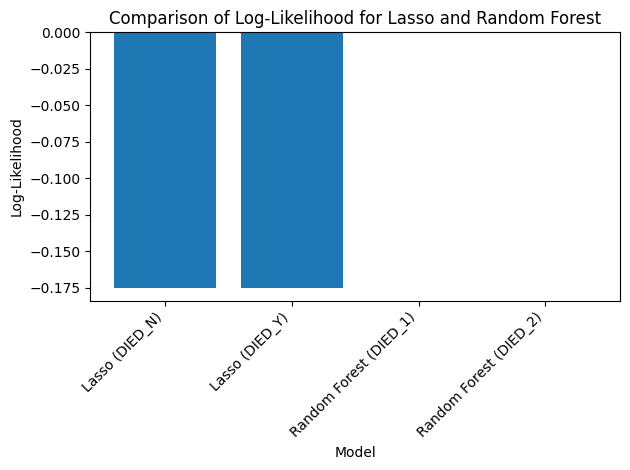

In [123]:
# Plot the log-likelihood for LASSO and Random forest

# Create a bar plot for comparison
models = ['Lasso (DIED_N)', 'Lasso (DIED_Y)', 'Random Forest (DIED_1)', 'Random Forest (DIED_2)']
log_likelihoods = [lasso_log_likelihood_n, lasso_log_likelihood_y, rf_log_likelihood_0, rf_log_likelihood_1]

plt.bar(models, log_likelihoods)
plt.xlabel('Model')
plt.ylabel('Log-Likelihood')
plt.title('Comparison of Log-Likelihood for Lasso and Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [124]:
# Compare the performance of LASSO with Random forest using ROC_AUC_Score

from sklearn.metrics import roc_auc_score

# Assuming you have already fit the Lasso and Random Forest models and obtained predictions (lasso_probs, rf_probs)
# ... (code from the previous problem)

# Calculate AUC for Lasso
lasso_auc_n = roc_auc_score(y_lasso_n, lasso_probs_n[:, 1])
lasso_auc_y = roc_auc_score(y_lasso_y, lasso_probs_y[:, 1])

# Calculate AUC for Random Forest
rf_auc_0 = roc_auc_score(y_rf_0, rf_probs_0[:, 1])
rf_auc_1 = roc_auc_score(y_rf_1, rf_probs_1[:, 1])

print("Lasso AUC (DIED_N):", lasso_auc_n)
print("Lasso AUC (DIED_Y):", lasso_auc_y)
print("Random Forest AUC (DIED_1):", rf_auc_0)
print("Random Forest AUC (DIED_2):", rf_auc_1)


Lasso AUC (DIED_N): 0.9320582538844102
Lasso AUC (DIED_Y): 0.9320582057772813
Random Forest AUC (DIED_1): 1.0
Random Forest AUC (DIED_2): 1.0


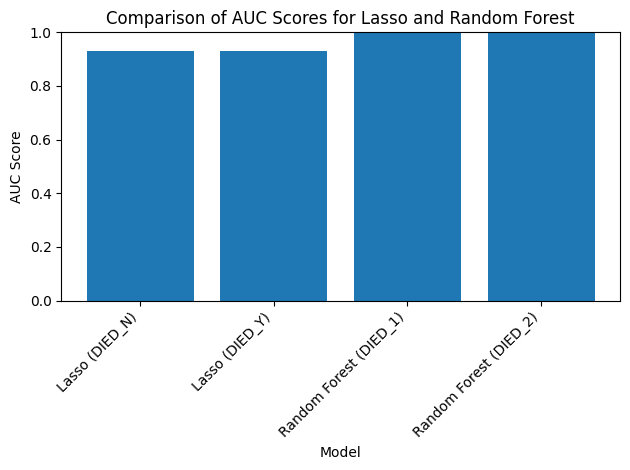

In [125]:
# Plot the graph for the roc_auc_score for Lasso and Random Forest

import matplotlib.pyplot as plt

# Data for the bar chart
models = ['Lasso (DIED_N)', 'Lasso (DIED_Y)', 'Random Forest (DIED_1)', 'Random Forest (DIED_2)']
auc_scores = [lasso_auc_n, lasso_auc_y, rf_auc_0, rf_auc_1]

# Create the bar chart
plt.bar(models, auc_scores)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Lasso and Random Forest')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for AUC scores
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
